In [40]:
import requests
from dotenv import load_dotenv
import os 
import pandas as pd
import numpy as np
import alpaca_trade_api as tradeapi
# from MCForecastTools import MCSimulation
import json
import matplotlib.pyplot as plt
import hvplot.pandas

In [41]:
load_dotenv()

True

In [42]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
# YOUR CODE HERE!
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version= "v2")

In [43]:
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'str'>
Alpca Secret Key type: <class 'str'>


In [44]:
current_date = pd.Timestamp("2020-01-05", tz="America/New_York").isoformat()

tickers = ["SPY", "AAPL", "TSLA", "GE", "F", "MSFT","NIO", "PFE", "AMZN","AAL","DIS","PLUG"]


timeframe = "1D"

In [45]:
df_ticker = alpaca.get_barset(
    tickers,
    timeframe,
    start=current_date
).df

df_ticker

AAL                                      AAPL  \
                             open     high    low   close    volume    open   
time                                                                          
2020-01-06 00:00:00-05:00  27.190  27.4901  27.08  27.320   5383583  293.79   
2020-01-07 00:00:00-05:00  27.560  27.6800  27.06  27.220   5570129  299.84   
2020-01-08 00:00:00-05:00  27.210  28.0900  27.10  27.840   9479470  297.16   
2020-01-09 00:00:00-05:00  28.090  28.2300  27.71  27.950   5923245  307.25   
2020-01-10 00:00:00-05:00  27.930  27.9900  27.25  27.320   7291102  310.60   
...                           ...      ...    ...     ...       ...     ...   
2021-01-06 00:00:00-05:00  15.450  15.8000  15.17  15.520  61348418  127.72   
2021-01-07 00:00:00-05:00  15.670  15.8700  15.38  15.380  45503976  128.36   
2021-01-08 00:00:00-05:00  15.430  15.5300  15.00  15.115  54302647  132.43   
2021-01-11 00:00:00-05:00  14.820  15.0400  14.71  15.005  38241743  129.19   
2021-01-12 00:00:00-05:00  15.075  15.4300  14.88  15.370  44835719  128.50   

                                                                   ...  \
                               high      low     close     volume  ...   
time                                                               ...   
2020-01-06 00:00:00-05:00  299.9600  292.750  299.7800   27487207  ...   
2020-01-07 00:00:00-05:00  300.9000  297.480  298.2700   24353387  ...   
2020-01-08 00:00:00-05:00  304.4399  297.156  303.1500   28984028  ...   
2020-01-09 00:00:00-05:00  310.4300  306.200  309.7100   38540792  ...   
2020-01-10 00:00:00-05:00  312.6700  308.250  310.3700   32304453  ...   
...                             ...      ...       ...        ...  ...   
2021-01-06 00:00:00-05:00  131.0499  126.382  126.5800  142064548  ...   
2021-01-07 00:00:00-05:00  131.6300  127.860  130.8500   95314687  ...   
2021-01-08 00:00:00-05:00  132.6300  130.230  131.9900   93211863  ...   
2021-01-11 00:00:00-05:00  130.1700  128.500  128.9800   84845947  ...   
2021-01-12 00:00:00-05:00  129.6900  126.860  128.8199   83381829  ...   

                                SPY                                      \
                               open    high       low   close    volume   
time                                                                      
2020-01-06 00:00:00-05:00  320.4800  323.73  320.3600  323.67  41271531   
2020-01-07 00:00:00-05:00  323.0200  323.54  322.2400  322.73  33333873   
2020-01-08 00:00:00-05:00  322.9400  325.78  322.6900  324.42  53033838   
2020-01-09 00:00:00-05:00  326.1600  326.73  325.5200  326.62  40652148   
2020-01-10 00:00:00-05:00  327.2899  327.46  325.2000  325.70  42585254   
...                             ...     ...       ...     ...       ...   
2021-01-06 00:00:00-05:00  369.7100  376.98  369.1200  373.53  91989131   
2021-01-07 00:00:00-05:00  376.1000  379.90  375.9100  379.06  58862006   
2021-01-08 00:00:00-05:00  380.5900  381.49  377.1000  381.24  60275466   
2021-01-11 00:00:00-05:00  377.8500  380.58  377.7189  378.74  44814805   
2021-01-12 00:00:00-05:00  378.8900  379.86  376.3600  378.81  45364896   

                             TSLA                                        
                             open    high       low     close    volume  
time                                                                     
2020-01-06 00:00:00-05:00  440.47  451.56  440.0000  451.4001   9807049  
2020-01-07 00:00:00-05:00  461.40  471.63  453.3550  469.1700  17164802  
2020-01-08 00:00:00-05:00  473.70  498.49  468.2300  492.0900  29492388  
2020-01-09 00:00:00-05:00  497.10  498.80  472.8700  481.4900  26229707  
2020-01-10 00:00:00-05:00  481.79  484.94  473.7000  477.9600  12193711  
...                           ...     ...       ...       ...       ...  
2021-01-06 00:00:00-05:00  758.49  774.00  749.1000  756.4600  41989335  
2021-01-07 00:00:00-05:00  777.63  816.99  775.2000  816.2400  48080256  
2021-01-08 00:00:00-0

In [46]:
df_closing_prices = pd.DataFrame()

for ticker in tickers:
    df_closing_prices[ticker] = df_ticker[ticker]['close']
# Preview DataFrame
# YOUR CODE HERE!
df_closing_prices

,SPY,AAPL,TSLA,GE,F,MSFT,NIO,PFE,AMZN,AAL,DIS,PLUG
time,,,,,,,,,,,,
2020-01-06 00:00:00-05:00,323.67,299.7800,451.4001,12.140,9.1500,159.02,3.6900,38.870,1903.33,27.320,145.65,3.8150
2020-01-07 00:00:00-05:00,322.73,298.2700,469.1700,12.055,9.2500,157.60,3.2500,38.760,1906.86,27.220,145.68,3.8050
2020-01-08 00:00:00-05:00,324.42,303.1500,492.0900,11.930,9.2500,160.14,3.3850,39.050,1892.09,27.840,145.45,4.0675
2020-01-09 00:00:00-05:00,326.62,309.7100,481.4900,11.900,9.2750,162.09,3.4700,38.890,1901.00,27.950,144.80,4.0450
2020-01-10 00:00:00-05:00,325.70,310.3700,477.9600,11.670,9.2500,161.32,3.5100,39.490,1882.98,27.320,144.60,4.1400
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-06 00:00:00-05:00,373.53,126.5800,756.4600,11.360,8.8422,212.22,50.5234,36.880,3138.01,15.520,179.12,35.0000
2021-01-07 00:00:00-05:00,379.06,130.8500,816.2400,11.280,9.0500,218.29,54.2500,37.050,3161.41,15.380,178.58,47.3000
2021-01-08 00:00:00-05:00,381.24,131.9900,880.0300,11.340,9.0000,219.55,58.9100,37.120,3182.70,15.115,178.68,53.7788


In [47]:
df_closing_prices.index = df_closing_prices.index.date

In [48]:
df_closing_prices

,SPY,AAPL,TSLA,GE,F,MSFT,NIO,PFE,AMZN,AAL,DIS,PLUG
2020-01-06,323.67,299.7800,451.4001,12.140,9.1500,159.02,3.6900,38.870,1903.33,27.320,145.65,3.8150
2020-01-07,322.73,298.2700,469.1700,12.055,9.2500,157.60,3.2500,38.760,1906.86,27.220,145.68,3.8050
2020-01-08,324.42,303.1500,492.0900,11.930,9.2500,160.14,3.3850,39.050,1892.09,27.840,145.45,4.0675
2020-01-09,326.62,309.7100,481.4900,11.900,9.2750,162.09,3.4700,38.890,1901.00,27.950,144.80,4.0450
2020-01-10,325.70,310.3700,477.9600,11.670,9.2500,161.32,3.5100,39.490,1882.98,27.320,144.60,4.1400
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-06,373.53,126.5800,756.4600,11.360,8.8422,212.22,50.5234,36.880,3138.01,15.520,179.12,35.0000
2021-01-07,379.06,130.8500,816.2400,11.280,9.0500,218.29,54.2500,37.050,3161.41,15.380,178.58,47.3000
2021-01-08,381.24,131.9900,880.0300,11.340,9.0000,219.55,58.9100,37.120,3182.70,15.115,178.68,53.7788
2021-01-11,378.74,128.9800,811.1800,11.455,9.3000,217.50,62.7250,37.770,3115.75,15.005,179.12,53.9700


In [49]:
df_closing_prices.std()

SPY      32.796824
AAPL    114.570795
TSLA    412.652248
GE        2.229266
F         1.446655
MSFT     22.897896
NIO      16.526782
PFE       2.362743
AMZN    540.806423
AAL       5.523461
DIS      20.655062
PLUG     10.147942
dtype: float64

In [50]:
df_current_price = df_closing_prices.tail(1)
df_current_price

,SPY,AAPL,TSLA,GE,F,MSFT,NIO,PFE,AMZN,AAL,DIS,PLUG
2021-01-12,378.81,128.8199,849.22,11.775,9.775,214.93,61.94,37.172,3120.88,15.37,175.98,66.02


In [124]:
df_closing_prices.hvplot(title="Closing Prices",
    xlabel="Date",
    ylabel="Price",
)

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [51]:
price_change_df = df_closing_prices.pct_change()
daily_price_change = price_change_df.dropna()

In [52]:
daily_prices_std = daily_price_change.std()
daily_prices_std

SPY     0.021432
AAPL    0.054952
TSLA    0.074223
GE      0.039426
F       0.035315
MSFT    0.027695
NIO     0.064397
PFE     0.022580
AMZN    0.024376
AAL     0.064862
DIS     0.030618
PLUG    0.066093
dtype: float64

In [53]:
annual_std = daily_prices_std * np.sqrt(252)
annual_std

SPY     0.340223
AAPL    0.872330
TSLA    1.178249
GE      0.625866
F       0.560615
MSFT    0.439645
NIO     1.022272
PFE     0.358443
AMZN    0.386957
AAL     1.029652
DIS     0.486048
PLUG    1.049189
dtype: float64

<AxesSubplot:title={'center':'Annual Standard Deviation'}, xlabel='TICKERS', ylabel='STD'>

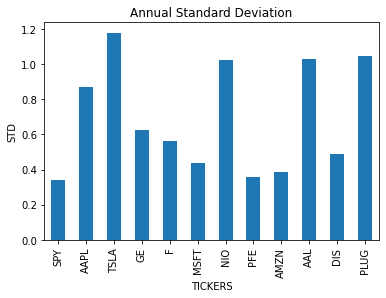

In [129]:
annual_std.plot.bar(title="Annual Standard Deviation",
    ylabel="STD",
    xlabel="TICKERS"
)

In [54]:
SPY_df = daily_price_change["SPY"]
spy500_return = SPY_df.mean() * 252
spy500_return

0.21248815044604794

In [55]:
standard_df = pd.DataFrame(annual_std, columns=["StandardDev"])
standard_df

,StandardDev
SPY,0.340223
AAPL,0.872330
TSLA,1.178249
GE,0.625866
F,0.560615
MSFT,0.439645
NIO,1.022272
PFE,0.358443
AMZN,0.386957
AAL,1.029652


<AxesSubplot:>

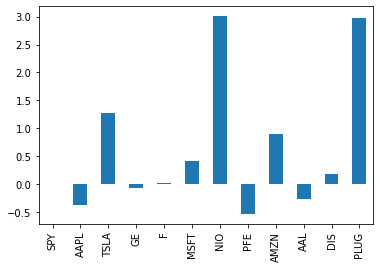

In [56]:
def sharpe_ratio(return_series, N, rf):
    mean = return_series.mean() * N -rf
    sigma = return_series.std() * np.sqrt(N)
    return mean / sigma

N = 252 #252 trading days in a year
rf = spy500_return #1% risk free rate
sharpe_ratio = daily_price_change.apply(sharpe_ratio, args=(N,rf,),axis=0)

sharpe_ratio.plot.bar()

Excess return is the return on the portfolio less risk-free rate.

Therefore, excess return is negative when the (realized or expected) return on the portfolio (or fund, trading strategy, or investment) is lower than the risk-free interest rate (typically a money market rate or treasury yield).

Sharpe ratio is negative when the investment return is lower than the risk-free rate.

In [57]:
sharpe_ratio_df = pd.DataFrame(sharpe_ratio, columns=["SharpeRatio"])
sharpe_ratio_df

,SharpeRatio
SPY,0.000000
AAPL,-0.380001
TSLA,1.282202
GE,-0.075189
F,0.011297
MSFT,0.408447
NIO,3.005594
PFE,-0.536386
AMZN,0.897461
AAL,-0.263059


In [58]:
sharpe_and_std = pd.concat([standard_df, sharpe_ratio_df], axis=1) 
sharpe_and_std

,StandardDev,SharpeRatio
SPY,0.340223,0.000000
AAPL,0.872330,-0.380001
TSLA,1.178249,1.282202
GE,0.625866,-0.075189
F,0.560615,0.011297
MSFT,0.439645,0.408447
NIO,1.022272,3.005594
PFE,0.358443,-0.536386
AMZN,0.386957,0.897461
AAL,1.029652,-0.263059


In [59]:
covariance = df_closing_prices.cov()
variance = df_closing_prices.var()
beta = covariance/variance
mrkt_beta = beta["SPY"]
beta

,SPY,AAPL,TSLA,GE,F,MSFT,NIO,PFE,AMZN,AAL,DIS,PLUG
SPY,1.000000,-0.104574,0.003296,6.123444,19.292512,1.169337,1.545636,8.731721,0.042613,1.323271,1.390340,2.422545
AAPL,-1.276169,1.000000,0.225061,-7.529313,-27.560438,-1.416361,-4.526996,-2.039818,-0.066130,2.676098,-2.018175,-6.492543
TSLA,0.521836,2.919583,1.000000,-44.107763,-45.038867,4.368549,-4.550731,18.360558,0.179766,-9.650561,-1.586328,-4.459700
GE,0.028292,-0.002851,-0.001287,1.000000,1.163246,-0.011762,0.033897,0.296397,-0.001254,0.340669,0.072703,0.058791
F,0.037537,-0.004394,-0.000554,0.489866,1.000000,0.027204,0.055644,0.355358,0.000788,0.153389,0.061930,0.084744
MSFT,0.569990,-0.056574,0.013451,-1.240944,6.815427,1.000000,1.008207,3.846909,0.040717,-1.222634,0.594888,1.545039
NIO,0.392483,-0.094197,-0.007299,1.863011,7.262107,0.525213,1.000000,2.221596,0.021643,-0.493844,0.580863,1.540883
PFE,0.045318,-0.000868,0.000602,0.332953,0.947914,0.040959,0.045407,1.000000,0.001327,0.104051,0.063588,0.067021
AMZN,11.586873,-1.473452,0.308762,-73.787264,110.190203,22.712707,23.175750,69.496111,1.000000,-45.685237,10.582638,35.050451
AAL,0.037533,0.006220,-0.001729,2.091369,2.236075,-0.071142,-0.055162,0.568636,-0.004766,1.000000,0.115509,-0.071280


In [60]:
alpha= np.mean(df_closing_prices)-beta*np.mean(df_closing_prices)
alpha.round(decimals=6)


,SPY,AAPL,TSLA,GE,F,MSFT,NIO,PFE,AMZN,AAL,DIS,PLUG
SPY,0.000000,282.851582,786.937315,-42.432863,-129.557882,-32.840167,-9.227579,-282.884671,2584.559564,-4.905426,-49.820837,-16.622349
AAPL,734.528735,0.000000,611.845223,70.640604,202.281120,468.614265,93.470312,111.219478,2878.123757,-25.433733,385.222942,87.549864
TSLA,154.305277,-491.553495,0.000000,373.586899,326.073205,-653.275757,93.871709,-635.180156,2214.301962,161.615542,330.104376,63.796233
GE,313.574187,256.802948,790.556246,0.000000,-1.156197,196.214927,16.338340,25.743106,2702.983337,10.004939,118.354997,10.997963
F,310.590761,257.198200,789.976934,4.224981,0.000000,188.658095,15.970571,23.585873,2697.470061,12.846792,119.730033,10.694711
MSFT,138.765924,270.560085,778.919659,18.559718,-41.188131,0.000000,-0.138794,-104.161395,2589.678919,33.727072,51.706203,-6.368739
NIO,196.048307,280.194401,795.303089,-7.147537,-44.351774,92.077351,0.000000,-44.695200,2641.169974,22.668147,53.496293,-6.320176
PFE,308.079723,256.295142,789.064640,5.524549,0.368899,185.990442,16.143692,0.000000,2696.017594,13.595465,119.518347,10.901795
AMZN,-3416.426009,633.384246,545.760247,619.395422,-773.346556,-4210.829016,-375.027297,-2506.104399,0.000000,708.418990,-1223.074272,-397.877264
AAL,310.592077,254.480271,790.905044,-9.038827,-8.754578,207.730762,17.844464,15.782536,2712.463757,0.000000,112.891440,12.517840


In [61]:
variance

SPY       1075.631678
AAPL     13126.467054
TSLA    170281.877987
GE           4.969628
F            2.092809
MSFT       524.313661
NIO        273.134519
PFE          5.582554
AMZN    292471.587601
AAL         30.508624
DIS        426.631571
PLUG       102.980731
dtype: float64

In [62]:
dataframe_beta = pd.DataFrame(beta.loc["SPY"])
dataframe_beta.columns = ["Beta"]

In [63]:
sharpe_std_beta = pd.concat([sharpe_and_std, dataframe_beta], axis=1) 
sharpe_std_beta.drop(["SPY"])
df_sharpe_std_beta = sharpe_std_beta.drop(["SPY"])
df_sharpe_std_beta

,StandardDev,SharpeRatio,Beta
AAPL,0.872330,-0.380001,-0.104574
TSLA,1.178249,1.282202,0.003296
GE,0.625866,-0.075189,6.123444
F,0.560615,0.011297,19.292512
MSFT,0.439645,0.408447,1.169337
NIO,1.022272,3.005594,1.545636
PFE,0.358443,-0.536386,8.731721
AMZN,0.386957,0.897461,0.042613
AAL,1.029652,-0.263059,1.323271
DIS,0.486048,0.184326,1.390340


In [64]:
# from sklearn.linear_model import LinearRegression
# import pandas as pd

In [65]:
# data = df_sharpe_std_beta

In [66]:
# model = LinearRegression()
# X, y = df_sharpe_std_beta[['StandardDev','Beta']], df_sharpe_std_beta.SharpeRatio
# model.fit(X, y)
# model.score(X, y)

In [67]:
# 1 - (1-model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)

In [68]:
# def calc_beta(df):
#     np_array = df.values
#     m = np_array[:,0] # market returns are column zero from numpy array
#     s = np_array[:,1] # stock returns are column one from numpy array
#     covariance = np.cov(s,m) # Calculate covariance between stock and market
#     beta = covariance[0,1]/covariance[1,1]
#     return beta

In [69]:
# df = df_closing_prices
# calc_beta(df)

## R squared vs Beta

R-squared measures how closely each change in the price of an asset is correlated to a benchmark. Beta measures how large those price changes are in relation to a benchmark. Used together, R-squared and beta give investors a thorough picture of the performance of asset managers.

In [70]:
# #Volatility
# ann_sd = df_closing_prices.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(252))
# ann_sd

In [71]:
df_sharpe_std_beta

,StandardDev,SharpeRatio,Beta
AAPL,0.872330,-0.380001,-0.104574
TSLA,1.178249,1.282202,0.003296
GE,0.625866,-0.075189,6.123444
F,0.560615,0.011297,19.292512
MSFT,0.439645,0.408447,1.169337
NIO,1.022272,3.005594,1.545636
PFE,0.358443,-0.536386,8.731721
AMZN,0.386957,0.897461,0.042613
AAL,1.029652,-0.263059,1.323271
DIS,0.486048,0.184326,1.390340


In [81]:
df_sharpe_std_beta.hvplot(title="Standard Deviation, Sharpe Ratio, Beta",
    xlabel="Tickers"
)

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [73]:
# trial_Df = df_current_price.T
# uno = pd.DataFrame(trial_Df)
# todays_price = uno.rename(columns = {'2021-01-07':'CurrentPrice'})

In [74]:
# hola = pd.concat([sharpe_std_beta, uno], axis=1)
# hola